### Alura - Curso: Clustering</br>Instrutora Thainá Mariani</br>28/09/2022 

### Modelos avaliados:
* KMeans
* DBSCAN(rascunho)
* MeanShift(rascunho)

### Métrica de avaliação do modelo
* Silhouette score 
* Davies-Bouldin score
* índice Calinski-Harabasz

## Projeto - Risco de atraso do pagamento da fatura

Para sabermos sobre este risco, temos três categorias (labels): 
* baixo;
* médio;
* alto.

O comportamento dos clientes em relação ao uso de cartão de crédito:
* Valor gasto;
* Número de transações;
* Limite total;
* Frequência de compras.

A partir da clusterização do comportamento vamos validar e saber se o agrupamento das características fazem sentido real e como validar a técnica que utilizamos.

## Recuperando a base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
# Origem dos dados no kaggle - https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
# link = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'     # git instrutora
link = 'https://drive.google.com/uc?id=15-tBy-Nv7XEGrupkGRUUWjNYDQ4gcxwx&export=download'                              # drive pessoal

df_cartao = pd.read_csv(link)
df_cartao.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
df_cartao.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Pré-processamento dos dados

removendo colunas não relevantes - 'CUST_ID', 'TENURE'

In [4]:
df_cartao.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df_cartao.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


avaliação dos dados faltantes, com describe foi possível perceber que existem

In [5]:
# avaliação dos dados faltantes
missing = df_cartao.isna().sum()
display(missing[missing > 0])

# substituir valores faltantes com a mediana
df_cartao.fillna(df_cartao.median(), inplace=True)

# avaliação dos dados faltantes
missing = df_cartao.isna().sum()
display(missing[missing > 0])

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

Series([], dtype: int64)

normalizar valores entre zero e um

In [6]:
scaler = MinMaxScaler()
df_cartao_scaler = scaler.fit_transform(df_cartao.values)


df_cartao_scaler = pd.DataFrame(df_cartao_scaler, columns=df_cartao.columns)
df_cartao_scaler.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000


### Clusterização dos dados

In [7]:
# n_init - Número de vezes que o algoritmo k-means será executado com diferentes centroides. 
#          Os resultados finais serão a melhor saída de n_init execuções consecutivas em termos de inércia.

# max_iter - Número máximo de iterações do algoritmo k-means para uma única execução.

kmeans, y_pred = _, _

def clustering_algorithm(df_cartao_scaler, n_clurters=5, n_init=10, max_iter=300):
    kmeans = KMeans(n_clusters=n_clurters, n_init=10, max_iter=300, random_state=22)
    return kmeans, kmeans.fit_predict(df_cartao_scaler)

kmeans, y_pred = clustering_algorithm(df_cartao_scaler, 5, 10, 300)    

In [8]:
# Quantidade de rgistros por cluster
pd.Series(y_pred).value_counts()

1    3579
4    2156
0    1197
3    1170
2     848
dtype: int64

## Avaliação do modelo de clusterização  

<hr>

### Silhouette Score

<img src='silhouette.png'>
<br/>
<strong>alfa</strong> - distância média entre o ponto e todos os outros pontos do mesmo cluster.</br>
<strong>beta</strong> - distância média entre o ponto e todos os outros pontos do cluster mais próximo. 
<br/><br/>
* silhouette_score é um número entre -1 e 1 ponderando a compactação interna e separação externa do clusters, permitindo avaliar a qualidade dos clursters gerados;
<br/>
* quanto mais próximo de 1 estiver o valor de silhouette mais separados estão os clusters.
<br/><br/>


In [9]:
silhouette = silhouette_score(df_cartao_scaler, kmeans.labels_, metric='euclidean')
print(f'Metrica de silhouette = {silhouette:.3f}')

Metrica de silhouette = 0.354


<font color='green'>
    Quanto mais próximo de 1 estiver o valor de silhouette mais separados estão os clusters.<br/>
    Trata-se de um valor bom, pois é maior que 0, e o coeficiente vai de menos um até um. Então, a partir do momento que temos um valor positivo, conseguiremos ter uma ideia se o cluster está bom de acordo com esta métrica ou não.    
</font>

<hr>

### Davies-Bouldin
<img src='Davies-Bouldin.png'>
<br/>
<strong>"R"</strong> Evoca outra formula para ser calculado</br>
<img src='R Davies-Bouldin.png'>
<br/>
* <strong>"S"</strong> é a similaridade dentro do cluster, isto é, compactação a partir do <u>centróide</u>.<br/>
* <strong>"D"</strong> reflete a separação a partir dos <u>centróides</u> dos clusters.
<br/><br/>
<img src='Gráfico Davies-Bouldin.png'>
<br/><br/>

In [10]:
dbs = davies_bouldin_score(df_cartao_scaler, kmeans.labels_)
print(f'Metrica de Davies-Bouldin = {dbs:.3f}')

Metrica de Davies-Bouldin = 1.181


<font color='green'>Métrica de Davies Bouldin, quanto mais próximo de 0 o valor, melhor.</font>

<hr>

### Calinski-Harabasz

<img src='Calinski-Harabasz.png'>
<br/>
Leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.
<br/><br/>
* Primeira parte da formula -  Razão entre a dispersão dentro do cluster e entre clusters.
* Segunda parte - o valor é multiplicado em relação ao número de clusters e elementos
<br/><br/>
* "nE" - número de elementos dentro do cluster;<br/>
* "K" - número de klusters;<br/>
* "Bk" - é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.<br/>
* "Wk" - é a dispersão de elementos dentro do cluster, sendo que a letra "W" significa within.<br/>
* "tr" - é o traço, isto é, a soma de diagonais da matriz dos valores que obtemos.
<br/><br/>
<img src='Wk Calinski-Harabasz.png'>
<br/><br/><br/>
<img src='Bk Calinski-Harabasz.png'>
<br/>

In [11]:
cs = calinski_harabasz_score(df_cartao_scaler, kmeans.labels_)
print(f'Calinski-Harabasz = {cs:.3f}')

Calinski-Harabasz = 4505.633


<font color='green'>Calinski, é melhor que o valor seja o mais alto possível.</font>

## Validação Relativa
Explorando parâmetros e medindo

In [12]:
def validando_modelo(df_cartao_scaler, n_clusters=5, n_init=10, max_iter=300):
    print(70 * '=')
    print(f'Modelo KMeans com {n_clusters} cluster, máximo de {n_init} execuções, e {max_iter} iterações.', end='\n\n')
    
    kmeans, y_pred = clustering_algorithm(df_cartao_scaler, n_clusters, n_init, max_iter)    
    
    silhouette = silhouette_score(df_cartao_scaler, kmeans.labels_, metric='euclidean')
    print(f'Metrica de silhouette     = {silhouette:.3f}')
    
    dbs = davies_bouldin_score(df_cartao_scaler, kmeans.labels_)
    print(f'Metrica de Davies-Bouldin = {dbs:.3f}')
    
    cs = calinski_harabasz_score(df_cartao_scaler, kmeans.labels_)
    print(f'Calinski-Harabasz         = {cs:.3f}')
    
    return silhouette

In [13]:
best_silhouette, best_n_clusters, best_n_init, best_max_iter = 0, 0, 10, 100

for n_clusters in range(2, 21):
    silhouette = validando_modelo(df_cartao_scaler, n_clusters, n_init=10, max_iter=100)
            
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_n_clusters = n_clusters

Modelo KMeans com 2 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.413
Metrica de Davies-Bouldin = 1.039
Calinski-Harabasz         = 7083.983
Modelo KMeans com 3 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.402
Metrica de Davies-Bouldin = 1.255
Calinski-Harabasz         = 5409.682
Modelo KMeans com 4 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.354
Metrica de Davies-Bouldin = 1.309
Calinski-Harabasz         = 4778.803
Modelo KMeans com 5 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.354
Metrica de Davies-Bouldin = 1.181
Calinski-Harabasz         = 4505.633
Modelo KMeans com 6 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.359
Metrica de Davies-Bouldin = 1.184
Calinski-Harabasz         = 4273.915
Modelo KMeans com 7 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.339
Metrica de Davi

In [14]:
print(f'Melhores parâmetros para silhouette {best_n_clusters, best_n_init, best_max_iter}')

Melhores parâmetros para silhouette (2, 10, 100)


In [15]:
silhouette = validando_modelo(df_cartao_scaler, best_n_clusters, best_n_init, best_max_iter)

Modelo KMeans com 2 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.413
Metrica de Davies-Bouldin = 1.039
Calinski-Harabasz         = 7083.983


## A estrutura dos clusters
Comparar os valores que obtemos do nosso dataset com outros de uma outra base de dados aleatório. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por consequencia, uma estrutura capaz de ser clusterizada.

In [16]:
df_cartao_scaler.shape

(8950, 16)

In [17]:
random_data = np.random.rand(8950, 16)

# apresentar os 2 primeiros registros
random_data[:2]

array([[0.84755133, 0.3885408 , 0.61975838, 0.0465239 , 0.38415076,
        0.20170424, 0.32936855, 0.62808744, 0.6357549 , 0.74813207,
        0.50384682, 0.51174586, 0.63773269, 0.08970749, 0.09022026,
        0.32611813],
       [0.53490703, 0.1598038 , 0.05785272, 0.59589625, 0.98114982,
        0.23283062, 0.66610878, 0.18776278, 0.42503153, 0.88318078,
        0.06702155, 0.07403724, 0.98327297, 0.02410569, 0.74332874,
        0.24699844]])

In [18]:
silhouette = validando_modelo(random_data, best_n_clusters, best_n_init, best_max_iter)

Modelo KMeans com 2 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.048
Metrica de Davies-Bouldin = 4.402
Calinski-Harabasz         = 455.781


<font color='green'>Comparando com a cluterização do dataframe cartão, a base de dados aleatória teve uma significante piora, demonstrando que a base de dados de cartão permite clusterização e evidencia a validade do cluster.</font>

## A estabilidade dos clusters
Dividir a base de dados origiral e repetir a clusterização não deve mudar muito as métricas, e permite validar o modelo de clusterização.

In [19]:
set1, set2, set3 = np.array_split(df_cartao_scaler, 3)

silhouette = validando_modelo(set1, best_n_clusters, best_n_init, best_max_iter)
silhouette = validando_modelo(set2, best_n_clusters, best_n_init, best_max_iter)
silhouette = validando_modelo(set3, best_n_clusters, best_n_init, best_max_iter)

Modelo KMeans com 2 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.408
Metrica de Davies-Bouldin = 1.053
Calinski-Harabasz         = 2313.795
Modelo KMeans com 2 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.419
Metrica de Davies-Bouldin = 1.033
Calinski-Harabasz         = 2399.182
Modelo KMeans com 2 cluster, máximo de 10 execuções, e 100 iterações.

Metrica de silhouette     = 0.430
Metrica de Davies-Bouldin = 0.978
Calinski-Harabasz         = 2637.700


<font color='green'>Rodando a clusterização com 1/3 da base não impactou as métricas de forma significativa. Temos valores parecidos nos três conjuntos e com as métricas diferentes, isso indica que nosso cluster é válido.</font>

## Gerando gráficos
O dataframe possui 16 atributo, que dificulta a apresentação de um gráfico de 16 dimensões.

Inicialmente vamos apresentar um gráfico com dois atributos
* PURCHASES (Valor total pago)
* PAYMENTS  (Valor total gasto)

In [20]:
kmeans, y_pred = clustering_algorithm(df_cartao_scaler, best_n_clusters, best_n_init, best_max_iter)   

In [21]:
# Quantidade de rgistros por cluster
pd.Series(y_pred).value_counts()

1    4913
0    4037
dtype: int64

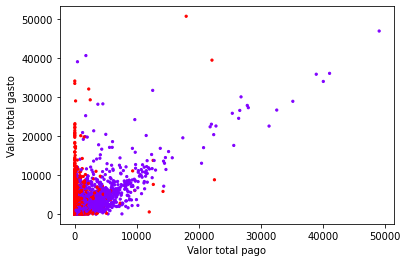

In [22]:
plt.scatter(
    x=df_cartao['PURCHASES'],
    y=df_cartao['PAYMENTS'],
    c=y_pred,                               # labels
    s=5,                                    # tamanho dos pontos no gráfico
    cmap='rainbow'                          # esquema de cores
)

plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

plt.show()

<font color='green'>
De maneira geral, em vermelho conseguimos perceber que o cluster representa os clientes que gastaram, contudo não pagaram a fatura ou a pagaram parcialmente.
</br></br>
Já o cluster representado pela cor roxa notaremos uma diagonal, o que indica que a medida que o valor gasto aumenta o valor pago também. Esse cluster representa os clientes que pagaram a fatura ou quase seu valor total.
</font>
</br></br>
<font color='orange'>
Temos informações interessantes, mas isso não é o suficiente para compreender todo o conjunto. Plotaremos outras dimensões, mas sempre em pares, e assim conseguiremos interpretar outros atributos de maneira clara, visível.
</font>

In [23]:
# A biblioteca seaborn exige incluir o label no dataframe
df_cartao_scaler['CLUSTER'] = y_pred
df_cartao['CLUSTER'] = y_pred

df_cartao_scaler.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CLUSTER
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1


In [24]:
# comando comentado devido a demora no processamento

# sns.pairplot(
#     df_cartao_scaler,
#     hue='CLUSTER'
# )

Resultado do processamento do pairplot com todas os 16 atributos:
</br></br>
<img src='pairplot seaborn.png'>

<font color='orange'>
Foram plotados 256 gráficos (16 x 16), São muitos, e isso dificulta nosso processo de validação das informações com a visualização dessa forma.
</br>
A visualização nem sempre é uma técnica que irá nos auxiliar na interpretação de clusters.
</br>
Vamos utilizar algumas estratégias para guiar nossa interpretação.
</font>

## Descrevendo os atributos
Uma alternativa à visualização gráfica é observar alguns valores estatísticos, como o valor total gasto pelo cliente ou a média de gastos por clientes em um cluster específico, por exemplo, entre outros recortes.

In [25]:
atributos = df_cartao.columns[df_cartao.columns != 'CLUSTER']

for atributo in atributos:
    display(df_cartao[[atributo, 'CLUSTER']].groupby('CLUSTER').describe().T)

CLUSTER                   0             1
BALANCE count   4037.000000   4913.000000
        mean    1404.359342   1696.041328
        std     2110.342337   2048.424218
        min        0.000000      0.000000
        25%       96.109401    195.804466
        50%      536.425055   1074.258487
        75%     1780.299975   2271.787500
        max    19043.138560  16304.889250

CLUSTER                            0            1
BALANCE_FREQUENCY count  4037.000000  4913.000000
                  mean      0.936241     0.828815
                  std       0.161900     0.274783
                  min       0.000000     0.000000
                  25%       1.000000     0.727273
                  50%       1.000000     1.000000
                  75%       1.000000     1.000000
                  max       1.000000     1.000000

CLUSTER                     0             1
PURCHASES count   4037.000000   4913.000000
          mean    1830.739557    323.221590
          std     2823.052393    862.302016
          min        8.400000      0.000000
          25%      451.010000      0.000000
          50%     1003.950000     64.710000
          75%     2194.290000    350.000000
          max    49039.570000  22500.000000

CLUSTER                            0             1
ONEOFF_PURCHASES count   4037.000000   4913.000000
                 mean    1000.131741    257.435911
                 std     2258.391240    761.612543
                 min        0.000000      0.000000
                 25%        0.000000      0.000000
                 50%      247.880000      0.000000
                 75%     1182.200000    229.000000
                 max    40761.250000  22101.780000

CLUSTER                                  0             1
INSTALLMENTS_PURCHASES count   4037.000000   4913.000000
                       mean     830.985145     66.022469
                       std     1136.444270    405.943999
                       min        0.000000      0.000000
                       25%      235.800000      0.000000
                       50%      493.430000      0.000000
                       75%     1027.920000     21.000000
                       max    15497.190000  22500.000000

CLUSTER                        0             1
CASH_ADVANCE count   4037.000000   4913.000000
             mean     566.152465   1318.001009
             std     1840.498574   2230.333318
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000    351.023706
             75%      144.017573   1784.023712
             max    47137.211760  26194.049540

CLUSTER                              0            1
PURCHASES_FREQUENCY count  4037.000000  4913.000000
                    mean      0.892768     0.159685
                    std       0.143585     0.184677
                    min       0.416667     0.000000
                    25%       0.833333     0.000000
                    50%       1.000000     0.083333
                    75%       1.000000     0.300000
                    max       1.000000     0.750000

CLUSTER                                     0            1
ONEOFF_PURCHASES_FREQUENCY count  4037.000000  4913.000000
                           mean      0.336067     0.092671
                           std       0.372335     0.146688
                           min       0.000000     0.000000
                           25%       0.000000     0.000000
                           50%       0.166667     0.000000
                           75%       0.666667     0.142857
                           max       1.000000     0.750000

CLUSTER                                           0            1
PURCHASES_INSTALLMENTS_FREQUENCY count  4037.000000  4913.000000
                                 mean      0.727749     0.065905
                                 std       0.299119     0.129042
                                 min       0.000000     0.000000
                                 25%       0.583333     0.000000
                                 50%       0.833333     0.000000
                                 75%       1.000000     0.083333
                                 max       1.000000     0.583333

CLUSTER                                 0            1
CASH_ADVANCE_FREQUENCY count  4037.000000  4913.000000
                       mean      0.077633     0.182401
                       std       0.166592     0.212621
                       min       0.000000     0.000000
                       25%       0.000000     0.000000
                       50%       0.000000     0.090909
                       75%       0.083333     0.250000
                       max       1.000000     1.500000

CLUSTER                           0            1
CASH_ADVANCE_TRX count  4037.000000  4913.000000
                 mean      1.947981     4.317728
                 std       5.601507     7.519316
                 min       0.000000     0.000000
                 25%       0.000000     0.000000
                 50%       0.000000     2.000000
                 75%       1.000000     6.000000
                 max     123.000000   123.000000

CLUSTER                        0            1
PURCHASES_TRX count  4037.000000  4913.000000
              mean     28.807283     3.125992
              std      30.793753     7.003010
              min       0.000000     0.000000
              25%      12.000000     0.000000
              50%      19.000000     1.000000
              75%      34.000000     5.000000
              max     358.000000   309.000000

CLUSTER                        0             1
CREDIT_LIMIT count   4037.000000   4913.000000
             mean    4935.377818   4131.835514
             std     3927.919107   3339.564853
             min      300.000000     50.000000
             25%     1800.000000   1500.000000
             50%     4000.000000   3000.000000
             75%     7000.000000   6000.000000
             max    30000.000000  23000.000000

CLUSTER                    0             1
PAYMENTS count   4037.000000   4913.000000
         mean    2059.382126   1465.074666
         std     3223.840872   2563.351467
         min        0.000000      0.000000
         25%      500.110264    318.521195
         50%     1130.376548    680.023540
         75%     2326.997535   1544.782363
         max    46930.598240  50721.483360

CLUSTER                            0             1
MINIMUM_PAYMENTS count   4037.000000   4913.000000
                 mean     872.167919    822.506345
                 std     2610.993007   2076.495018
                 min        0.019163      0.037744
                 25%      165.586015    184.381222
                 50%      231.774034    352.392567
                 75%      778.239214    796.476168
                 max    76406.207520  61031.618600

CLUSTER                           0            1
PRC_FULL_PAYMENT count  4037.000000  4913.000000
                 mean      0.255366     0.070188
                 std       0.354936     0.192063
                 min       0.000000     0.000000
                 25%       0.000000     0.000000
                 50%       0.000000     0.000000
                 75%       0.500000     0.000000
                 max       1.000000     1.000000

<font color='orange'>
Temos muitos atributos para se analisar, neste caso são 16. Ainda há casos em que há muitos mais, portanto é uma análise que seria impossível ser realizada por um aspecto visual.
</br></br>
Selecionaremos alguns dos atributos mais significativos. O que não quer dizer que os outros não sejam importantes, mas precisaremos fazer essa triagem para executar nossa análise.
</font>

## Variância entre os atributos dos centróides

Uma estratégia de seleção de atributos é analisar os centroides, medir a variância entre os atributos, os que apresentarem maior variancia são os atributos de maior relevancia para o modelo de cluterização.

In [26]:
print('Listando os centroides')
kmeans.cluster_centers_

Listando os centroides


array([[0.07373696, 0.93627297, 0.03731958, 0.02452419, 0.03692785,
        0.01202416, 0.89259392, 0.33590096, 0.72763665, 0.05186758,
        0.0158918 , 0.08043987, 0.16307918, 0.04061622, 0.01142387,
        0.25525972],
       [0.08907697, 0.82874495, 0.00658864, 0.00631827, 0.00292445,
        0.0279564 , 0.15952974, 0.09270867, 0.06572791, 0.1215368 ,
        0.03506646, 0.00872514, 0.13630916, 0.02886805, 0.01075681,
        0.07019998]])

In [27]:
print('Calculando a variancia do primeiro atributo, entre os centroides')
kmeans.cluster_centers_[:, 0].var()

Calculando a variancia do primeiro atributo, entre os centroides


5.882895573334156e-05

In [28]:
print('Calculando a variancia de todos os atributos, entre os centroides', end='\n\n')

ls_variancia = []

for i , atributo in enumerate(atributos):
    print(
        f'{i:02d} -',
        f'{atributo:35} -',
        f'{kmeans.cluster_centers_[:, i].var():.5f}'
    )
    
    ls_variancia.append(kmeans.cluster_centers_[:, i].var())

Calculando a variancia de todos os atributos, entre os centroides

00 - BALANCE                             - 0.00006
01 - BALANCE_FREQUENCY                   - 0.00289
02 - PURCHASES                           - 0.00024
03 - ONEOFF_PURCHASES                    - 0.00008
04 - INSTALLMENTS_PURCHASES              - 0.00029
05 - CASH_ADVANCE                        - 0.00006
06 - PURCHASES_FREQUENCY                 - 0.13435
07 - ONEOFF_PURCHASES_FREQUENCY          - 0.01479
08 - PURCHASES_INSTALLMENTS_FREQUENCY    - 0.10953
09 - CASH_ADVANCE_FREQUENCY              - 0.00121
10 - CASH_ADVANCE_TRX                    - 0.00009
11 - PURCHASES_TRX                       - 0.00129
12 - CREDIT_LIMIT                        - 0.00018
13 - PAYMENTS                            - 0.00003
14 - MINIMUM_PAYMENTS                    - 0.00000
15 - PRC_FULL_PAYMENT                    - 0.00856


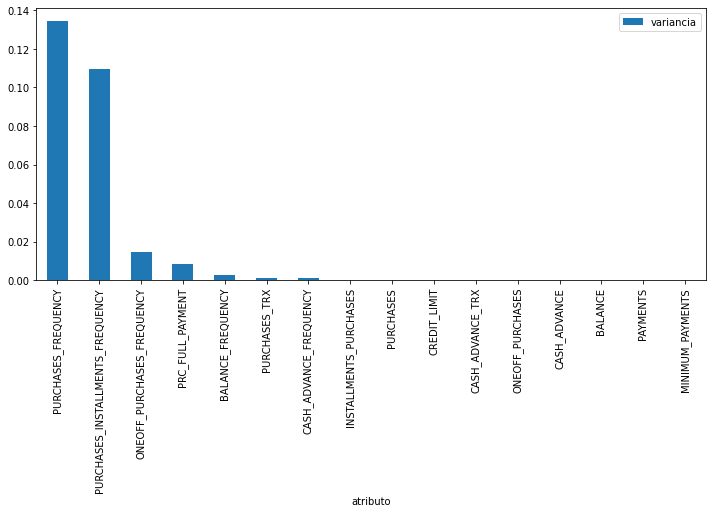

In [29]:
df_variancia = pd.DataFrame({'atributo':atributos, 'variancia':ls_variancia})

ax = df_variancia.sort_values(
        by='variancia',
        ascending=False
    ).plot.bar(
        x='atributo', 
        y='variancia', 
        figsize=(12,5), 
        rot=90
    )

<font color=green>
    O gráfico ajudou a visualizar os 5 atributos que possuem maior variancia:
</font>

* PURCHASES_FREQUENCY  
* PURCHASES_INSTALLMENTS_FREQUENCY
* ONEOFF_PURCHASES_FREQUENCY
* PRC_FULL_PAYMEN
* BALANCE_FREQUENCY
* CASH_ADVANCE_FREQUENCY

In [30]:
atributos_maior_variancia = df_variancia.sort_values(
        by='variancia',
        ascending=False
    ).atributo[:5]

atributos_maior_variancia

6                  PURCHASES_FREQUENCY
8     PURCHASES_INSTALLMENTS_FREQUENCY
7           ONEOFF_PURCHASES_FREQUENCY
15                    PRC_FULL_PAYMENT
1                    BALANCE_FREQUENCY
Name: atributo, dtype: object

In [31]:
description = df_cartao.groupby('CLUSTER')[atributos_maior_variancia].mean()
description['N_CLIENTS'] = df_cartao['CLUSTER'].value_counts()

description

,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,BALANCE_FREQUENCY,N_CLIENTS
CLUSTER,,,,,,
0,0.892768,0.727749,0.336067,0.255366,0.936241,4037
1,0.159685,0.065905,0.092671,0.070188,0.828815,4913


<font color='green'>
    A partir dos valores dos principais atributos é possível diferencias os clientes agrupados por cluster.     
</font>

## Utilizando os clusters
Uma forma de utilização dos clustar seria a buscar rentabilizar os clientes, por exemplos:</br></br>

<strong>1ª</strong> - Onde o grupo com maiores gastos e bons pagadores poderiamos aumentar o limite para fomentar a utilização do cartão;</br>
<strong>2ª</strong> - Clientes com baixo gasto e maior utilização de saques poderia utilizar alguma estratégia de pontuação com alguma empresa de vendas;</br>
<strong>3ª</strong> - Clientes com pagamento parcial do valor total do cartão poderia receber uma oferta de crédito com taxas mais baixas.</br></br>

Para validação das estratégias abordadas, podemos aplicar o chamado teste AB. Dividindo os clientes do cluster em dois grupos: o grupo de controle e o grupo de teste, avaliando durante um tempo se o objetivo buscado está sendo alcançado.